# **ML**- FIRST PROJECT

# Load Data :

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

# **Data preparation :**

## Data separation as x and y

In [ ]:
y = df ['median_house_value']
y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [ ]:
x = df.drop('median_house_value', axis=1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


## Data splitting

In [ ]:
# Turn the categories into numbers:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Categorical_Features = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  Categorical_Features)],
                                remainder = "passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<17000x25698 sparse matrix of type '<class 'numpy.float64'>'
	with 136000 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [ ]:
x_train # -> a subset to train a model.
        # -> We have considered x variables
        # -> In this block we recieve 80% of 57421 rows
        # -> Therefore, x_train will have 80% of the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14730,-122.19,37.77,45.0,1852.0,393.0,1132.0,349.0,2.7159
9389,-119.21,36.38,18.0,2158.0,413.0,1461.0,395.0,2.0216
7662,-118.37,33.90,32.0,332.0,103.0,177.0,102.0,3.3409
9146,-119.02,35.34,35.0,1650.0,390.0,1145.0,343.0,1.5357
13485,-121.96,38.34,14.0,3035.0,680.0,1597.0,663.0,3.6036
...,...,...,...,...,...,...,...,...
16304,-122.50,37.92,32.0,2639.0,415.0,1013.0,408.0,6.1632
79,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882
12119,-121.44,38.63,33.0,1077.0,271.0,753.0,236.0,1.3462
14147,-122.07,37.70,39.0,1420.0,272.0,645.0,277.0,4.1250


In [ ]:
x_test  # -> a subset to test the trained model.
        # -> We have considered x variables
        # -> In this block we recieve 20% of 57421 rows
        # Therefore, x_test will have 20% of the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1559,-117.22,33.87,16.0,56.0,7.0,39.0,14.0,2.6250
5775,-118.19,33.89,38.0,4018.0,986.0,3702.0,927.0,2.9293
10247,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806
5234,-118.14,34.19,45.0,3595.0,619.0,1686.0,607.0,4.7300
1416,-117.18,32.80,30.0,2456.0,390.0,1022.0,393.0,3.8542
...,...,...,...,...,...,...,...,...
9213,-119.06,36.07,20.0,2683.0,553.0,1497.0,548.0,1.7031
15348,-122.29,37.89,52.0,3171.0,698.0,1498.0,696.0,3.1795
14256,-122.09,39.13,28.0,4169.0,895.0,2587.0,810.0,2.3310
5688,-118.18,33.78,20.0,1852.0,556.0,1712.0,556.0,1.4565


# **Model building :**

### **Linear Regression**

##### **Training the model**

In [ ]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [ ]:
pd.DataFrame(transformed_x)

,0
0,"(0, 826)\t1.0\n (0, 992)\t1.0\n (0, 1681)\..."
1,"(0, 825)\t1.0\n (0, 1013)\t1.0\n (0, 1685)..."
2,"(0, 824)\t1.0\n (0, 942)\t1.0\n (0, 1683)\..."
3,"(0, 823)\t1.0\n (0, 937)\t1.0\n (0, 1680)\..."
4,"(0, 823)\t1.0\n (0, 930)\t1.0\n (0, 1686)\..."
...,...
16995,"(0, 3)\t1.0\n (0, 1586)\t1.0\n (0, 1718)\t..."
16996,"(0, 2)\t1.0\n (0, 1597)\t1.0\n (0, 1702)\t..."
16997,"(0, 1)\t1.0\n (0, 1663)\t1.0\n (0, 1683)\t..."
16998,"(0, 1)\t1.0\n (0, 1660)\t1.0\n (0, 1685)\t..."


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#####**Applying the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)


In [ ]:
y_lr_train_pred

array([193961.13230286,  55380.74997241, 209334.94818747, ...,
        56914.90236741, 246066.13243686, 177628.68892092])

In [ ]:
y_lr_test_pred

array([105792.10475745, 170287.01487412,  44448.03776704, ...,
       101753.43790568, 119528.12837404, 185136.56584701])

#####**Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train) : ', lr_train_mse)
print('LR R2 (Train) : ', lr_train_r2)
print('LR MSE (Test) : ', lr_train_mse)
print('LR R2 (Test) : ', lr_train_r2)


LR MSE (Train) :  4813528324.925169
LR R2 (Train) :  0.6424832398553348
LR MSE (Test) :  4813528324.925169
LR R2 (Test) :  0.6424832398553348


In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]

In [ ]:
lr_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,4813528324.925169,0.642483,4873911285.875875,0.636331


### ***Random Forest***

##### **Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

##### **Applying the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [ ]:
y_rf_train_pred

array([135450.81965377, 135450.81965377, 209479.63405339, ...,
       135450.81965377, 211070.09176266, 135450.81965377])

In [ ]:
y_rf_test_pred

array([135450.81965377, 143059.85615739, 201847.11235325, ...,
       135450.81965377, 135450.81965377, 135450.81965377])

##### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest ', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]

In [ ]:
rf_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,7113377017.184139,0.471666,7245989908.166185,0.459338


### **Model comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis = 0)

In [ ]:
df_models.reset_index(drop = True)

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,4813528324.925169,0.642483,4873911285.875875,0.636331
1,Random Forest,7113377017.184139,0.471666,7245989908.166185,0.459338


# **Data visualization of predicted results :**

Text(0.5, 0, 'Experimental LogS')

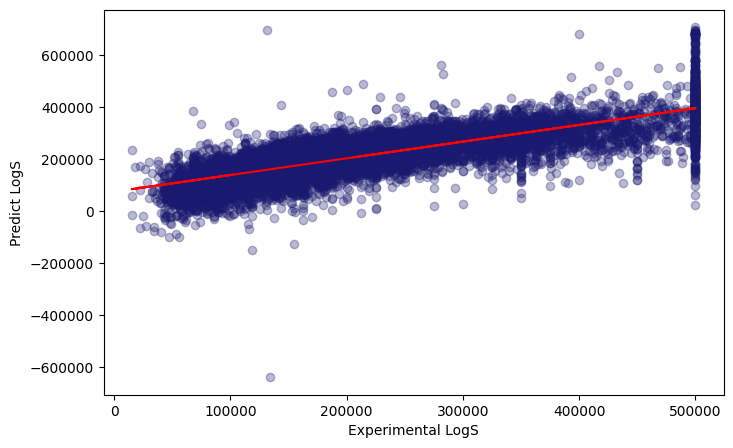

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (8,5))


plt.scatter(x = y_train, y = y_lr_train_pred,c= "#191970", alpha = 0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#FF0000')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')